ایمپورت کردن

In [1]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

دانلود دیتاست

In [2]:
from urllib.request import urlretrieve
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv"
urlretrieve(url, "weather-stations20140101-20141231.csv") 
print("Done!")

Done!


In [3]:
import pandas as pd
pdf = pd.read_csv("weather-stations20140101-20141231.csv")
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


حذف ردیف‌هایی بدون مقدار Tm

In [4]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


مصور سازی با استفاده از Cartopy

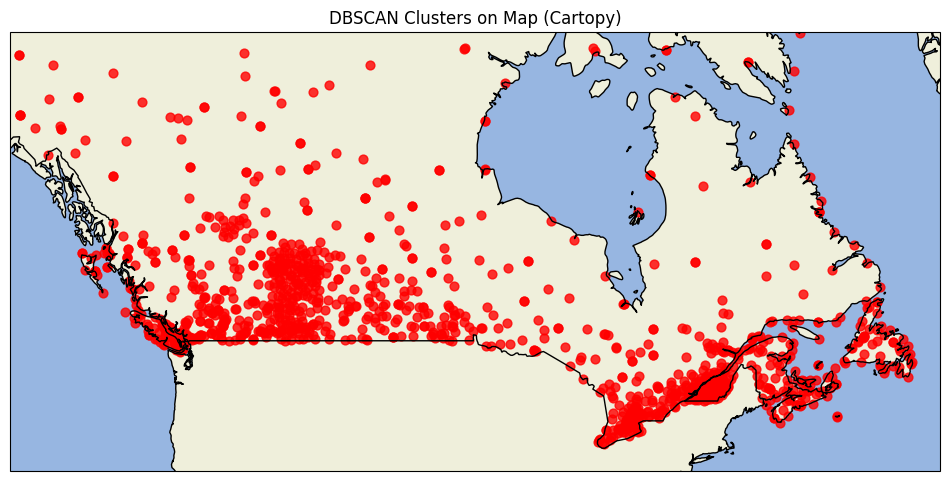

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# فیلتر محدوده نقشه: کانادا و اطراف
pdf = pdf[(pdf['Long'] > -140) & (pdf['Long'] < -50) &
          (pdf['Lat'] > 40) & (pdf['Lat'] < 65)]

# شروع رسم نقشه
plt.figure(figsize=(12, 8))

# ایجاد محور نقشه با پروجکشن مرکاتور
ax = plt.axes(projection=ccrs.Mercator())

# مشخص کردن محدوده نقشه
ax.set_extent([-140, -50, 40, 65], crs=ccrs.PlateCarree())

# افزودن اجزای نقشه مثل مرز کشورها، خشکی، دریا
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

# رسم نقاط داده روی نقشه
ax.scatter(pdf['Long'], pdf['Lat'],
           color='red', s=40, alpha=0.8,
           transform=ccrs.PlateCarree())

# عنوان
plt.title('DBSCAN Clusters on Map (Cartopy)')
plt.show()

کلاستر کردن بر اساس موقعیت برای مثال : Longitude & Latitude

In [6]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

sklearn.utils.check_random_state(1000)
xs,ys = (np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

Clus_dataSet = pdf[['xm','ym']]

Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# محاسبه DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# نمونه کلاستر
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


مشخص کردن لیبل‌ها

In [7]:
set(labels)

{np.int64(-1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5)}

مصور سازی بر اساس موقعیت

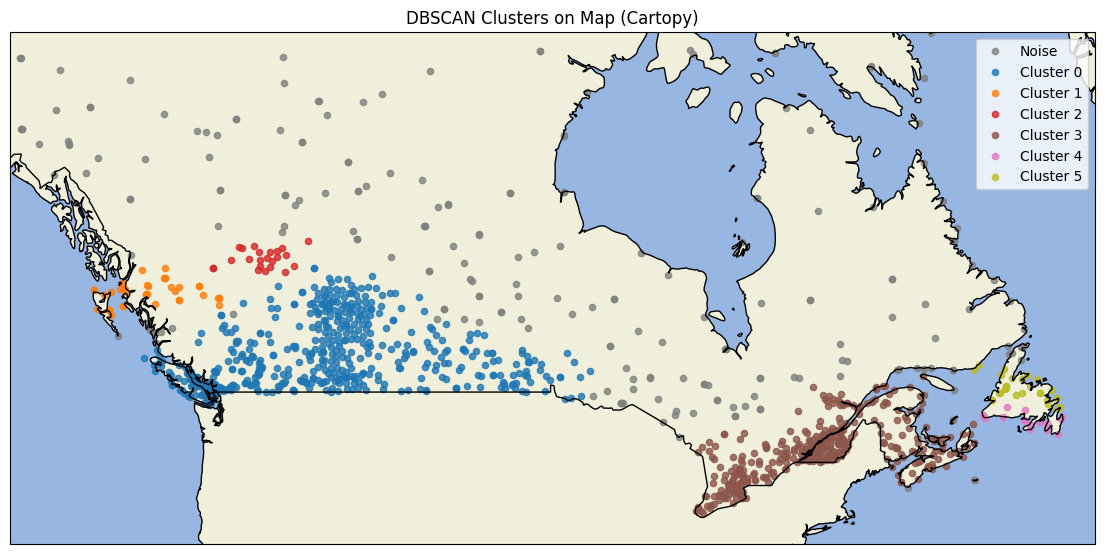

In [8]:
# فیلتر محدوده (مثلاً کانادا)
llon, ulon = -140, -50
llat, ulat = 40, 65

# ساخت لیست رنگ‌ها برای خوشه‌ها
clusterNum = len(set(pdf['Clus_Db']))
colors = plt.get_cmap('tab10')(np.linspace(0, 1, clusterNum))

# شروع رسم نقشه
plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([llon, ulon, llat, ulat], crs=ccrs.PlateCarree())

# اضافه کردن ویژگی‌های نقشه
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# رسم نقاط خوشه‌ها
for clust_number in sorted(set(pdf['Clus_Db'])):
    if clust_number == -1:
        color = 'gray'  # نویزها
    else:
        color = colors[int(clust_number)]
        
    clust_set = pdf[pdf['Clus_Db'] == clust_number]
    ax.scatter(clust_set['Long'], clust_set['Lat'],
               color=color, s=20, alpha=0.8,
               transform=ccrs.PlateCarree(),
               label=f'Cluster {clust_number}' if clust_number != -1 else 'Noise')

# عنوان و راهنما
plt.title('DBSCAN Clusters on Map (Cartopy)')
plt.legend()
plt.show()

کلاستر بر اساس دما

In [9]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


مصور سازی براساس دما

Cluster 0, Avg Temp: 6.22
Cluster 1, Avg Temp: 6.79
Cluster 2, Avg Temp: -0.49
Cluster 3, Avg Temp: -13.77
Cluster 4, Avg Temp: -4.19
Cluster 5, Avg Temp: -16.30
Cluster 6, Avg Temp: -13.61
Cluster 7, Avg Temp: -9.70
Cluster 8, Avg Temp: -4.26


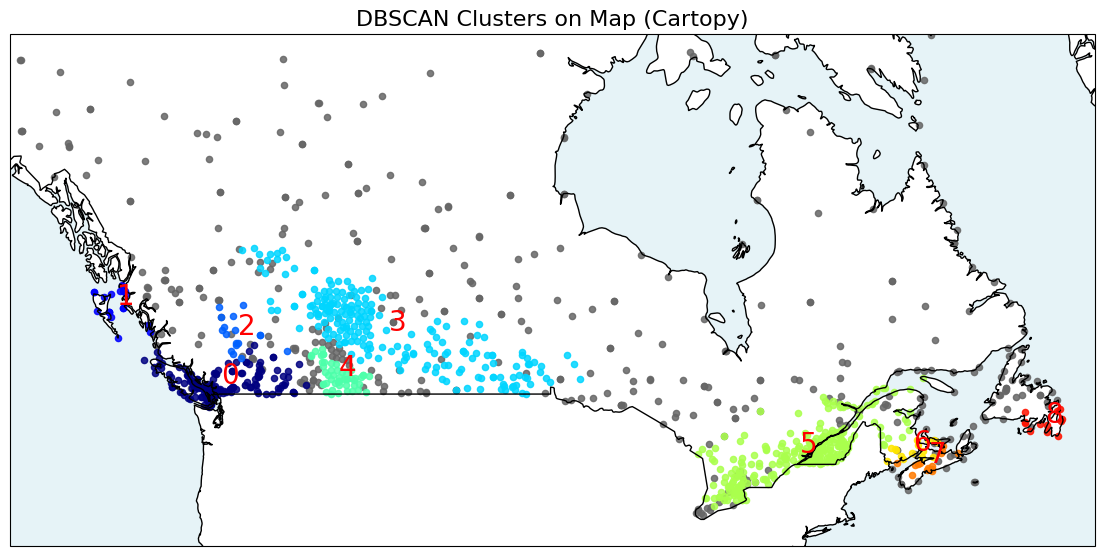

In [10]:
# تعداد خوشه‌ها (از قبل)
clusterNum = len(set(pdf['Clus_Db']))
colors = plt.get_cmap('jet')(np.linspace(0, 1, clusterNum))

# تنظیم محدوده نقشه (برای مثال شمال آمریکا)
llon, ulon = -140, -50
llat, ulat = 40, 65

# ساخت نقشه
plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([llon, ulon, llat, ulat], crs=ccrs.PlateCarree())

# ویژگی‌های پایه نقشه
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='white', alpha=0.3)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)

# نمایش خوشه‌ها روی نقشه
for clust_number in sorted(set(pdf['Clus_Db'])):
    # رنگ نویز خاکستری، بقیه با colormap
    c = ([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)]
    
    clust_set = pdf[pdf['Clus_Db'] == clust_number]
    
    # رسم نقاط هر خوشه
    ax.scatter(clust_set['Long'], clust_set['Lat'],
               color=c, s=20, alpha=0.85,
               transform=ccrs.PlateCarree())
    
    # نمایش شماره خوشه در مرکز آن
    if clust_number != -1:
        cen_long = clust_set['Long'].mean()
        cen_lat = clust_set['Lat'].mean()
        plt.text(cen_long, cen_lat, str(clust_number),
                 transform=ccrs.PlateCarree(),
                 fontsize=20, color='red')
        
        # چاپ دمای میانگین
        print(f"Cluster {clust_number}, Avg Temp: {clust_set['Tm'].mean():.2f}")

plt.title("DBSCAN Clusters on Map (Cartopy)", fontsize=16)
plt.show()